In [1]:
import sys
import pandas as pd
import numpy as np


In [3]:
sys.path.append("../")


In [4]:
import biobss


In [5]:
import neurokit2 as nk
sample_data = pd.read_pickle("..\sample_data\\EDA_Chest.pkl")
sample_data = sample_data.flatten()


In [35]:
decompose = biobss.pipeline.Bio_Process(
    process_method=biobss.edatools.eda_decompose, modality="EDA", sigtype="EDA", method="highpass")

filtering=biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.filter_signal, modality="EDA", sigtype="EDA",N=2, filter_type="highpass",f1=0.5,fs=700)

normalize = biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.normalize_signal, modality="EDA", sigtype="EDA")
resample = biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.resample_signal_object, modality="EDA", sigtype="EDA", target_sample_rate=350)
signal_features = biobss.pipeline.Feature(name="signal_features", function=biobss.edatools.signal_features.get_signal_features, parameters={
                                           "modality": "EDA", "sigtype": "EDA"}, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
stat_features = biobss.pipeline.Feature(name="stat_features", function=biobss.common.stat_features.get_stat_features, parameters={
                                         "modality": "EDA", "sigtype": "EDA"}, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
corr_features = biobss.pipeline.Feature(name="corr_features", function=biobss.common.correlation_features, parameters={
                                        "modality": "EDA", "sigtype": "EDA","signal_names":['EDA_Raw','EDA_Tonic','EDA_Phasic']}, input_signals={'EDA':['EDA_Raw','EDA_Tonic','EDA_Phasic']})


In [36]:
pipe = biobss.pipeline.Bio_Pipeline(modality="EDA", sigtype="EDA", windowed_process=True,
                                    window_size=60, step_size=30, features_list=[])


In [37]:
pipe.preprocess_queue.add_process(normalize)
pipe.preprocess_queue.add_process(filtering)
pipe.process_queue.add_process(decompose)
pipe.process_queue.add_process(resample)
pipe.add_feature_step(signal_features)
pipe.add_feature_step(stat_features)
pipe.add_feature_step(corr_features)


In [38]:
pipe.feature_list

In [39]:
pipe.set_input(sample_data, 700, name="EDA_Raw", modality="EDA")


In [40]:
pipe.input


Signal object with 1 channel(s)
EDA_Raw (EDA) (700Hz) ((5920.0,)s) (1 windows) ((4144000,))

In [41]:
pipe


Bio_Pipeline:
	Modality: EDA
	Signal Type: EDA
	Preprocessors: Process list:
	1: normalize_signal
	2: filter_signal

	Processors: Process list:
	1: eda_decompose
	2: resample_signal_object

	Postprocessors: Process list:

	Window Size(Seconds): 60
	Step Size: 30

In [42]:
pipe.run_pipeline()


c:\Users\cagatay.tasci\Desktop\R&D Workspace\pipelne module\biobss\examples\..\biobss\pipeline\bio_process.py:54: UserWarning: Vectorized method failed. Trying scalar method. It may be significantly slower.
  warnings.warn(


In [14]:
pipe.input


Signal object with 3 channel(s)
EDA_Raw (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))
EDA_Tonic (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))
EDA_Phasic (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))

In [43]:
pipe.extract_features()


In [44]:
pipe.features


,EDA_Raw_rms,EDA_Raw_acr_length,EDA_Raw_integral,EDA_Raw_average_power,EDA_Tonic_rms,EDA_Tonic_acr_length,EDA_Tonic_integral,EDA_Tonic_average_power,EDA_Phasic_rms,EDA_Phasic_acr_length,...,EDA_Phasic_std,EDA_Phasic_max,EDA_Phasic_min,EDA_Phasic_range,EDA_Phasic_kurtosis,EDA_Phasic_skew,EDA_Phasic_momentum,EDA_RawEDA_Tonic_correl,EDA_RawEDA_Phasic_correl,EDA_TonicEDA_Phasic_correl
0.0,0.006927,20999.746719,111.477480,0.000048,0.000088,20999.000000,0.723307,7.710382e-09,0.007863,20999.746847,...,0.007863,0.061107,-0.046422,0.107529,2.834434,-0.184260,0.000062,-0.010101,0.863560,0.039465
30.0,0.007417,20999.689246,118.983180,0.000055,0.000192,20999.000000,1.328443,3.674972e-08,0.007491,20999.689269,...,0.007491,0.067627,-0.033801,0.101428,2.199859,0.539798,0.000056,-0.009891,0.990673,-0.033290
60.0,0.007963,20999.745588,127.078197,0.000063,0.002064,20999.000011,13.912783,4.261139e-06,0.008396,20999.745587,...,0.008383,0.062961,-0.096394,0.159355,2.799643,0.262927,0.000070,-0.017485,0.953403,-0.256670
90.0,0.007751,20999.838683,121.922557,0.000060,0.000577,20999.000001,3.920468,3.328975e-07,0.010187,20999.838887,...,0.010187,0.065519,-0.125994,0.191513,6.726467,-1.109412,0.000104,0.002265,0.764709,-0.055125
120.0,0.006416,20999.755134,100.246571,0.000041,0.000383,20999.000000,2.603088,1.467712e-07,0.006450,20999.755151,...,0.006450,0.056068,-0.135898,0.191966,15.588552,-0.132041,0.000042,-0.004063,0.995765,-0.062015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730.0,0.004865,20999.227507,73.052544,0.000024,0.001157,20999.000004,7.838318,1.337900e-06,0.005006,20999.227529,...,0.004999,0.048463,-0.066063,0.114526,6.969665,0.313473,0.000025,0.004361,0.972539,-0.220741
5760.0,0.005303,20999.279072,80.009559,0.000028,0.000454,20999.000001,3.086181,2.064901e-07,0.005469,20999.279068,...,0.005468,0.064340,-0.085566,0.149905,9.329467,0.176057,0.000030,-0.005349,0.969058,-0.087249
5790.0,0.005298,20999.286993,79.863054,0.000028,0.000698,20999.000001,4.710426,4.871654e-07,0.005438,20999.286980,...,0.005436,0.063897,-0.087333,0.151230,11.483326,0.249172,0.000030,0.009020,0.972762,-0.116365
5820.0,0.005482,20999.235638,82.690613,0.000030,0.000572,20999.000001,3.961909,3.274195e-07,0.005523,20999.235635,...,0.005521,0.059603,-0.085187,0.144790,6.696580,0.256555,0.000030,0.006434,0.993190,-0.095585


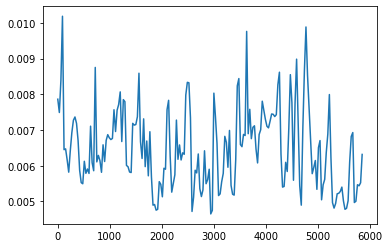

In [50]:
import matplotlib.pyplot as plt
plt.plot(pipe.features['EDA_Phasic_rms'])


In [46]:
pipe.features['EDA_Raw_acr_length']

0.0       20999.746719
30.0      20999.689246
60.0      20999.745588
90.0      20999.838683
120.0     20999.755134
              ...     
5730.0    20999.227507
5760.0    20999.279072
5790.0    20999.286993
5820.0    20999.235638
5850.0    20999.165633
Name: EDA_Raw_acr_length, Length: 196, dtype: float64